<a href="https://colab.research.google.com/github/CodexKnight-ai/Learning_Machine_Learning/blob/main/LogisticRegwithGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding coefficients for Loss function of Logistic Regression through **Gradient Descent**

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [3]:
import matplotlib.pyplot as plt


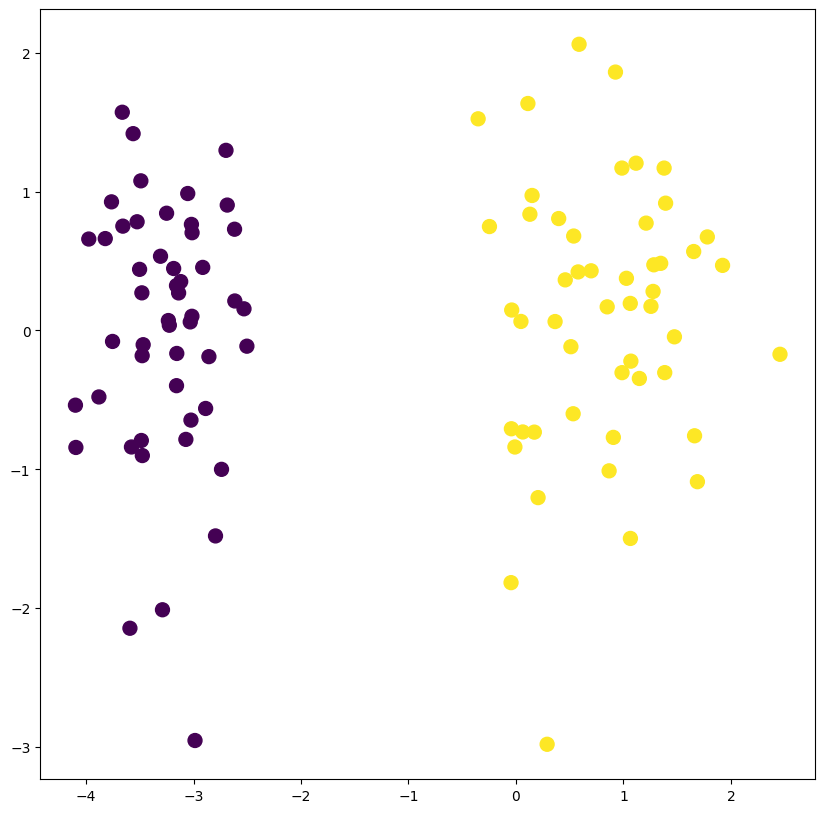

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,s=100)

Firstly through Scikit learn class

In [16]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [17]:
print(lor.coef_)
print(lor.intercept_)

[[4.90903324 0.19681564]]
[5.91587137]


In [21]:
m1= -(lor.coef_[0][0]/lor.coef_[0][1])
b1= -(lor.intercept_[0]/lor.coef_[0][1])

In [22]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1

Through Gradient Descent

In [27]:
def gd(X,y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.5

  for i in range(2500):
    y_hat=sigmoid(np.dot(X,weights))
    weights=weights+lr*(np.dot((y-y_hat),X)/X.shape[0])     #Batch gradient descent
  return weights[1:],weights[0]

In [26]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [28]:
coef_,intercept_=gd(X,y)

In [29]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [37]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

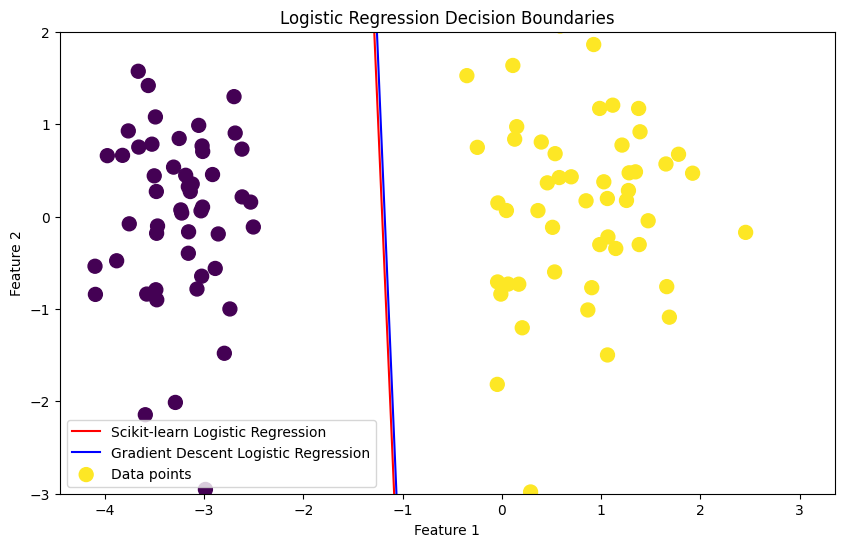

In [43]:
plt.figure(figsize=(10,6))

# Plot the logistic regression lines
plt.plot(x_input, y_input, color='red', label='Scikit-learn Logistic Regression')
plt.plot(x_input1, y_input1, color='blue', label='Gradient Descent Logistic Regression')

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, label='Data points')

# Set y-limits
plt.ylim(-3, 2)

# Add labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundaries")
plt.legend()

plt.show()
